In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from importlib import reload
import GEFSchwinger
reload(GEFSchwinger)
from GEFSchwinger import GEF
import ModeByModeSchwinger
reload(ModeByModeSchwinger)
from ModeByModeSchwinger import ModeByMode
from scipy.interpolate import CubicSpline

MbM Schwinger

In [2]:
#Set coupling Constant
beta=25.

#Set up initial conditions for the GEF system (I plan to streamline this at some point)
alpha = 0.
Mpl = 1.
M = 6e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0, "delta":1.0, "rhoChi":0.0}
SE = "mix"
AltDamp=2
ntr = 100
H = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=AltDamp, approx=True)
t1 = 125

#Set path to the directory where the GEF results are stored
path = os.getcwd()
if AltDamp == 0:
    suffix = ""
elif AltDamp == 1:
    suffix = "_Del1"
elif AltDamp == 2:
    suffix = "_KDep_1it"

name = path+f"/../Out/GEF_Beta{beta}_SE" + SE + suffix + ".dat"
print(name)
H.LoadData(name)
MbM = ModeByMode(H, kdep=True)

/home/richard/Documents/Phd Muenster/Axions in the early Universe/GEF/GEFSchwinger/../Out/GEF_Beta25.0_SEmix_KDep_1it.dat
[61.01322827]


In [3]:
ks = np.logspace(np.log10(MbM.mink), np.log10(MbM.maxk), 500)
ks, tstart = MbM.InitialKTN(ks, mode="k")

0.10259069312982742


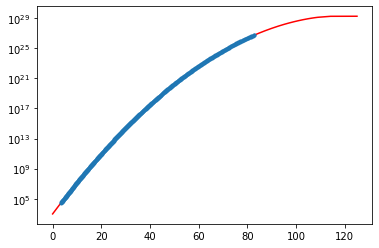

In [4]:
plt.plot(H.vals["t"], 10**(5/2)*H.vals["kh"], "r")
plt.plot(tstart, ks, ".")
plt.yscale("log")

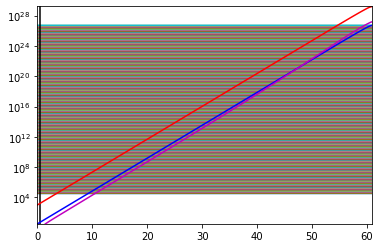

In [5]:
for i, k in enumerate(ks):
    plt.plot(H.vals["N"], np.ones(H.vals["N"].shape)*k)
plt.vlines(0.5, H.vals["kh"][0], 10**(5/2)*H.vals["kh"][-1], "k")
plt.plot(H.vals["N"], H.vals["kh"], "b")
plt.plot(H.vals["N"], H.vals["kS"], "m")
plt.plot(H.vals["N"], 10**(5/2)*H.vals["kh"], "r")
plt.xlim(0, 61)
plt.ylim(H.vals["kh"][0], 10**(5/2)*H.vals["kh"][-1])
plt.yscale("log")

In [6]:
Neval = np.arange(H.EndOfInflation()[0], 5, -0.1)[::-1]
#print(Neval)
teval = CubicSpline(H.vals["N"], H.vals["t"])(Neval)

[61.01322827]


In [7]:
Ap = []
dAp = []
Am = []
dAm = []
for i, k in enumerate(ks):
    A1, A2, A3, A4 = MbM.ComputeMode(k, tstart[i], teval=teval)
    Ap.append(A1)
    Am.append(A3)
    dAp.append(A2)
    dAm.append(A4)

Ap = np.array(Ap)
Am = np.array(Am)
dAp = np.array(dAp)
dAm = np.array(dAm)

In [8]:
print(len(Neval))

561


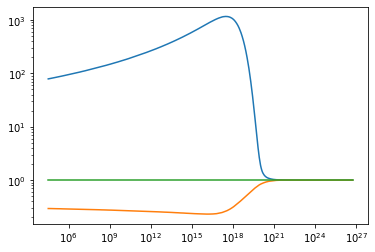

In [10]:

plt.plot(ks, abs(Am[:,400]))
plt.plot(ks, abs(Ap[:,400]))
plt.plot(ks, np.ones(ks.shape))
plt.yscale("log")
plt.xscale("log")
plt.show()

In [11]:
EMode = []
BMode = []
GMode = []
#print(Ap[60,:])
#print(ts.size)
for i, t in enumerate(teval):
    Etmp, Btmp, Gtmp = MbM.ComputeEBGnMode(Ap[:,i], Am[:,i], dAp[:,i], dAm[:,i], t, ks)
    EMode.append(Etmp)
    BMode.append(Btmp)
    GMode.append(Gtmp)
    
EMode1 = np.array(EMode)
BMode1 = np.array(BMode)
GMode1 = np.array(GMode)

[61.01322827]


/tmp/ipykernel_6647/1545757238.py:9: RuntimeWarning: divide by zero encountered in divide
  errE = abs(ER - EMode1)/EMode1
/tmp/ipykernel_6647/1545757238.py:11: RuntimeWarning: divide by zero encountered in divide
  errB = abs(BR - BMode1)/BMode1
/tmp/ipykernel_6647/1545757238.py:13: RuntimeWarning: divide by zero encountered in divide
  errG = abs(GR - GMode1)/GMode1


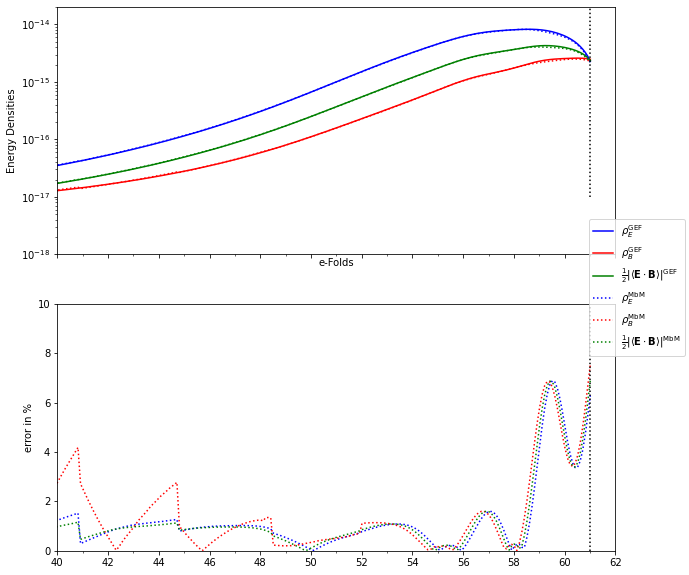

In [12]:
fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
ER = CubicSpline(H.vals["N"], H.vals["E"])(Neval)
BR = CubicSpline(H.vals["N"], H.vals["B"])(Neval)
GR = CubicSpline(H.vals["N"], H.vals["G"])(Neval)
NR = Neval
Nend = H.EndOfInflation()[0]
omega = H.H0
rhoE = 0.5*ER*omega**4
errE = abs(ER - EMode1)/EMode1
rhoB = 0.5*BR*omega**4
errB = abs(BR - BMode1)/BMode1
rhoG = 0.5*abs(GR)*omega**4
errG = abs(GR - GMode1)/GMode1

xticks = np.arange(36, 57, 2)
xticksmin = np.arange(35, 58, 2)
xticks = np.arange(40, 64, 2)
xticksmin = np.arange(41, 63, 2)
yticks = 10**(-1.*np.arange(14, 17))

ax[0].plot(NR, rhoE, "b", label=r"$\rho_E^{\mathrm{GEF}}$")
ax[0].plot(NR, rhoB, "r", label=r"$\rho_B^{\mathrm{GEF}}$")
ax[0].plot(NR, rhoG, "g", label=r"$\frac{1}{2} |\langle \mathbf{E} \cdot \mathbf{B} \rangle|^{\mathrm{GEF}}$")
ax[0].plot(NR, 0.5*EMode1*omega**4, "b:", label=r"$\rho_E^{\mathrm{MbM}}$")
ax[0].plot(NR, 0.5*BMode1*omega**4, "r:", label=r"$\rho_B^{\mathrm{MbM}}$")
ax[0].plot(NR, 0.5*abs(GMode1)*omega**4, "g:", label=r"$\frac{1}{2} |\langle \mathbf{E} \cdot \mathbf{B} \rangle|^{\mathrm{MbM}}$")
ax[0].vlines(Nend, ymin=1e-17, ymax=2e-10, colors="k", linestyles="dotted")
ax[0].set_ylim(1e-18, 2e-14)
ax[0].set_xlim(40, max(Neval))#Nend+1)

ax[0].set_xticks(xticks)
ax[0].set_xticks(xticksmin, minor=True)
ax[0].set_yticks(yticks)
ax[0].set_ylabel("Energy Densities")
ax[1].set_ylabel("error in %")
ax[0].set_xlabel("e-Folds")
ax[0].set_xlabel("e-Folds")
ax[0].set_yscale("log")
ax[1].plot(NR, abs(errE*100), "b:")
ax[1].plot(NR, abs(errB*100), "r:")
ax[1].plot(NR, abs(errG*100), "g:")
ax[1].set_ylim(0.,10)
ax[1].vlines(Nend, ymin=0, ymax=50, colors="k", linestyles="dotted")
#ax[1].set_yticks(np.arange(0,5,1))
lines_labels = [ax[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=5)

In [13]:
MbM.SaveMode(teval, ks, Ap, dAp, Am, dAm, name="../Modes/MbM_Beta25.0+SEmix+KDep1it.dat")